## Introduction

#### Netflix is one of the most popular streaming services worldwide. I am exploring the Netflix data set to learn more about the variety of content offered on Netflix. Are there more movies or TV shows? What genres and ratings do most of the content have?
#### I got the dataset from Kaggle (source: https://www.kaggle.com/datasets/shivamb/netflix-shows) and it was last updated in mid-2021. The dataset is originally from https://flixable.com/.

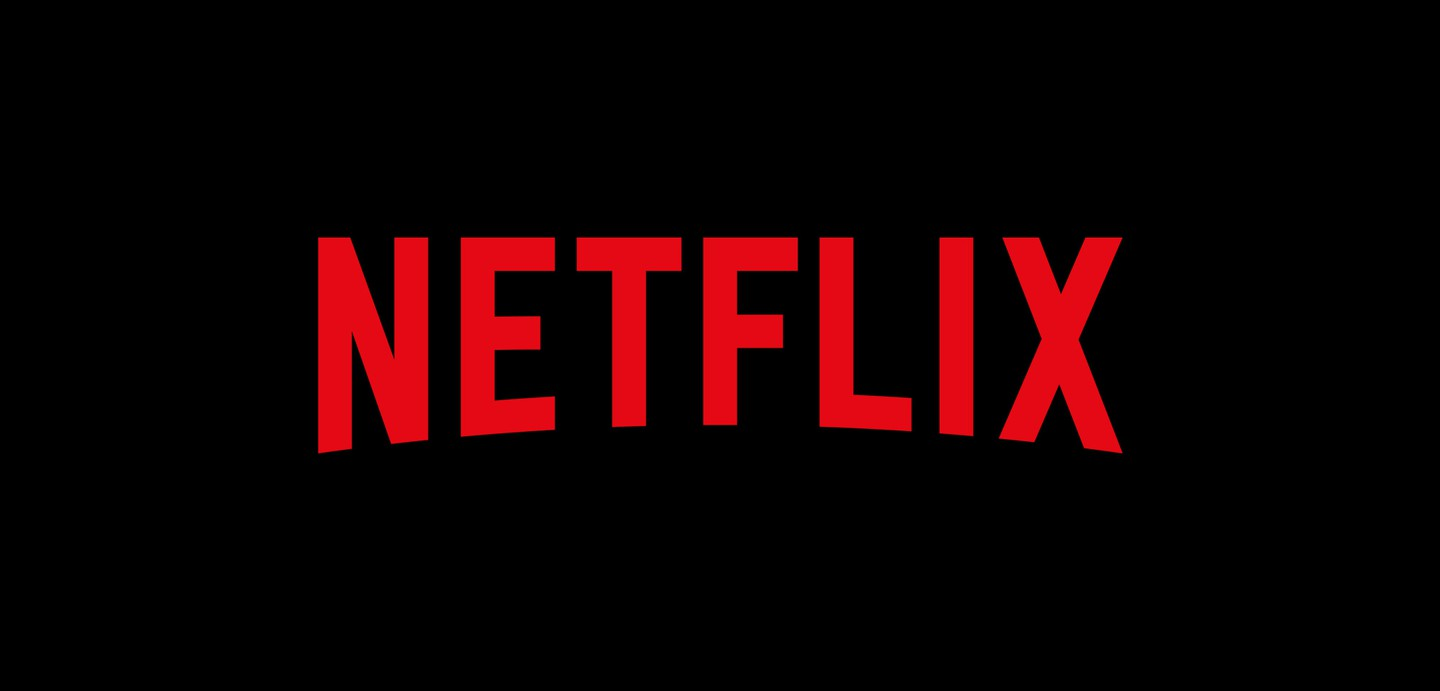

In [ ]:
#Loading libraries
import pandas as pd
import matplotlib.pyplot as plt

## Data Cleaning and Preparation

In [28]:
#Loading the data
df_original = pd.read_csv('netflix_titles.csv')
df = df_original.copy()

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [30]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [48]:
#Checking for Null
df.isnull().sum()

show_id         0
type            0
title           0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [32]:
#Dropping director, cast and data_added columns since they are not relevant to the question and analysis
df.drop(['director','cast','date_added','country'],axis = 1,inplace = True)

#Replacing missing rating with most common rating
for rating in df.rating:
    df['rating'].fillna(df['rating'].mode()[0], inplace=True)

## Data Analysis

In [33]:
#Analyzing the 'type' of content
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [34]:
df1 = df[df['release_year']>=2010]

In [35]:
df_movie = df1[df1['type'] == 'Movie']
df_tv = df1[df1['type'] == 'TV Show']

In [36]:
dfgrp_movie = df_movie.groupby(['release_year'])
dfgrp_tv = df_tv.groupby(['release_year'])

In [37]:
movie_count = dfgrp_movie.count()
tv_count = dfgrp_tv.count()

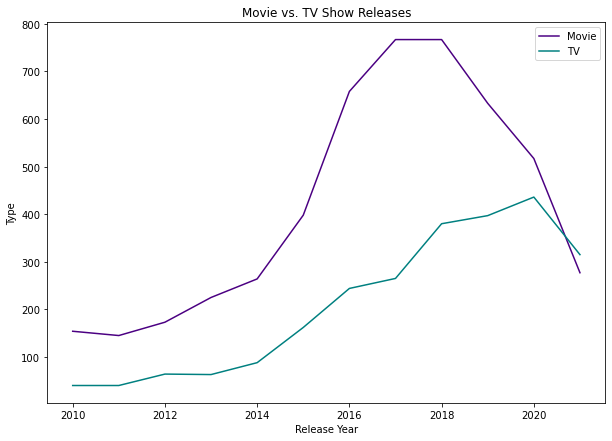

In [38]:
plt.figure(figsize = (10,7))

ax = plt.gca()

plt.title('Movie vs. TV Show Releases')
movie_count.plot(y='type', ax=ax, label='Movie',color='indigo')
tv_count.plot(y='type', ax=ax, label='TV',color='teal')

ax.set_xlabel('Release Year')
ax.set_ylabel('Type')
plt.legend()
plt.show()

#### This vizualization shows an overall pattern in movie and tv show releases that were added to Netflix after 2010. Significantly more movies were released until 2018 when that metric started falling but tv show releases continued to increase until 2020 at which point tv show releases starts to fall as well but not as much as movie releases. 

In [39]:
#Analyzing genres of content available on Netflix
df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

In [40]:
#Count of movie genres
movie_10 = df_movie["listed_in"].value_counts()[:10]
movie_sorted = movie_10.sort_values()

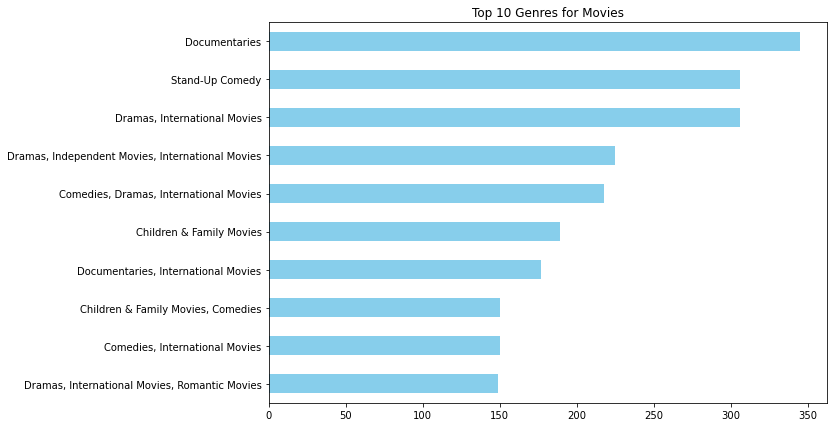

In [41]:
#Bar plot showing top 10 genres for movies
plt.figure(figsize = (10,7))
plt.title('Top 10 Genres for Movies')
movie_sorted.plot(kind='barh', color ='skyblue')
plt.show()

#### This vizualization shows the most common genres of Movies on Netflix. 'Documentaries' are the most common genre followed by 'Stand-Up Comedy' and 'Dramas, International Movies'. 

In [42]:
#Count of TV show genres
tv_10 = df_tv["listed_in"].value_counts()[:10]
tv_sorted = tv_10.sort_values()

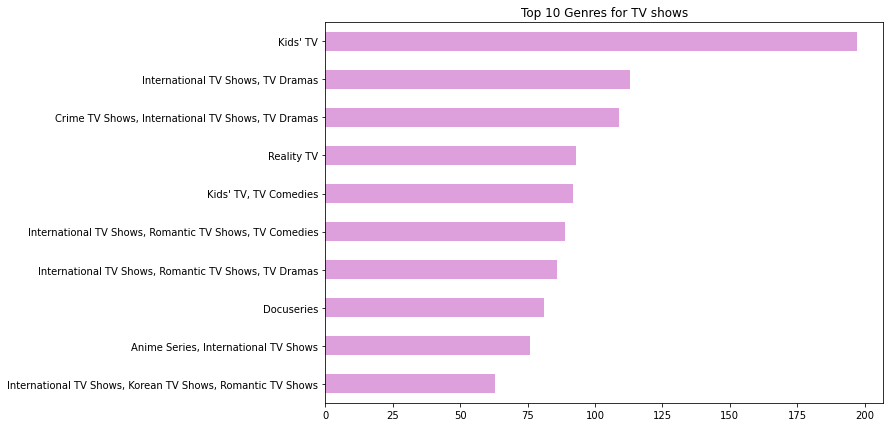

In [43]:
#Bar plot showing top 10 genres for tv shows
plt.figure(figsize = (10,7))
plt.title('Top 10 Genres for TV shows')
tv_sorted.plot(kind='barh', color='plum')
plt.show()

#### This vizualization shows the most common genres of TV Shows on Netflix. 'Kids' TV' is the most common followed by 'International TV Shows, TV Dramas' and 'Crime TV Shows, International TV Shows, TV Dramas'. 

In [44]:
#Analyzing ratings of content available on Netflix
df['rating'].value_counts()

TV-MA       3211
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [45]:
#Dropping nonsensical values from rating
df.drop(df[df['rating']=='74 min'].index,inplace=True)
df.drop(df[df['rating']=='84 min'].index,inplace=True)
df.drop(df[df['rating']=='66 min'].index,inplace=True)

In [46]:
#Grouping and sorting by ratings
df_rating = df.groupby('rating').size()
rating_sorted = df_rating.sort_values()

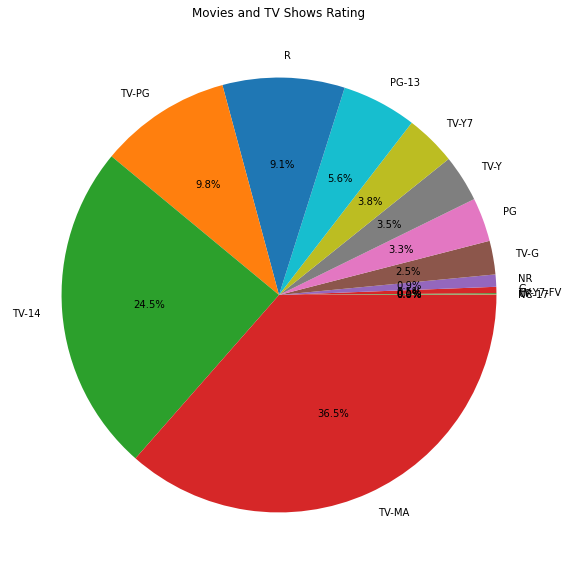

In [47]:
#Pie chart showing most common ratings
plt.figure(figsize = (10,10))

rating_sorted.plot(kind='pie', autopct='%.1f%%')
plt.title('Movies and TV Shows Rating')

ax = plt.gca()
ax.set_ylabel(None)

plt.show()

#### This pie chart shows the composition of ratings of Movies and TV Shows on Netflix. TV-MA is the most common, followed by TV-14 and TV-PG. 

## Next Steps

#### If I had more time, I would have liked to get the data directly from Netflix so that I could make inferences based on a more updated dataset. I would also conduct an analysis to see which countries have the most production, most actors and which are the most popular languages offered. 